<a href="https://colab.research.google.com/github/NinelK/SA_DS_tutorial/blob/main/DS_tutorial_Parts_1_2_SOLUTIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial:** Dynamical systems in neuroscience

## Introduction

Dynamical systems are systems that **evolve** in time. These can be physical systems, economic systems, neurons, neural networks or the whole brain. No matter what the system is, the universal dynamical system framework can help us understand its time-dependent behavior.

When modelling dynamics, we can represent time in two different ways: *discrete* or *continuous*. In both cases, we can write down the evolution of the system as a function of its previous `state' $\mathbf{x}$ and external inputs that the system receives $\mathbf{u}$:

Discrete time systems               |           Continuous time systems
------------------------------------|-------------------------------------
 $$\mathbf{x}_{t+1} = F_d(\mathbf{x}_t,\mathbf{u}_t)$$           |    $$\frac{d\mathbf{x}(t)}{dt} = F_c(\mathbf{x}(t),\mathbf{u}(t))$$
 
*Notation:* The variables in **bold** here correspond to vectors, e.g. $\mathbf{x} = (x_1,x_2,\ldots,x_n)^T$.

Here, the state $\mathbf{x}$ can, for instance, correspont to neural firing. In discrete case, $\mathbf{x}_t$ would be the number of spikes emmited within one time bin, while $\mathbf{x}(t)$ could be a function which is only non-zero at spike times.
External inputs $\mathbf{u}$ in this case would correspond to the inputs from other neurons.

The key part of the dynamical systems framework is the **evolution operator** $F$. Whether continuous $F_c$ or discrete $F_d$, it can tell us a lot about the system:
> The power of the dynamical systems approach to neuroscience, as well as to many other sciences, is that we can tell something, or many things, about a system without knowing all the details that govern the system evolution. We do not even use equations to do that! Some may even wonder why we call it a mathematical theory.        *Eugene Izhikevich [1]*

Therefore, the main goal of the tutorial is to learn how to tell something about the dynamical system knowing $F$.

# Part 1: Autonomous linear dynamical systems (LDS)

Sometimes, we can assume that the system does not receive any external inputs and evolves in time on its own ( $u(t)=0$ ). Such dynamical systems are called **autonomous**. Autonomous systems are common in physics, but also surprisingly applicable to some biological neural networks, as we will see in the last part of the tutorial. Lack of external inputs greatly simplifies the analysis of the dynamics $F$, so let us assume **no** external inputs for now.

As a warmup, let us start with a 1D autonomous continuous-time dynamical system:

$\frac{dx}{dt} = \dot x = a x; \qquad x(0) = x_0 \tag{1} $

We are looking at a so-called *initial value problem* here: we know the state of the system $x_0$ at $t=0$, but we want to make a forecast into the future and find $x(t)$ for $t>0$.

## Solving a 1D linear dynamics equation
Let us solve equation (1) both numerically and analytically.

For numerical integration, we will use the *forward Euler* scheme:

$$\frac{dx}{dt} \approx \frac{\Delta x}{\Delta t} = \frac{x_{n+1} - x_n}{\Delta t} \tag{2}$$

### **Exercise 1a:** Analytical vs numerical solutions
Complete the missing lines in the code below. Does analytical solution match the numerical solution? 

In [1]:
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets       # interactive display
from matplotlib import rcParams
rcParams.update({'font.size': 18})

def analytical_1D_solution(x0,a,t):
  ''' Finds a solution of x' = ax, for x(t), given x(0) = x0 '''
  xt = x0 * np.exp(a*t) # 2remove
  return xt

def numerical_1D_solution(x0,a,t,dt=0.001):
  ''' Integrates x' = ax using a forward Euler scheme, given x(0) = x0;
  Returns x(t) '''
  N = int(t//dt) # number of integration steps #2remove
  xn = x0 # current value of x_n
  for n in range(N):
    x_n_plus_1 = xn + a*xn*dt # write a discretized update rule following (1-2) #2remove
    xn = x_n_plus_1  
  return xn

T = 1 # total duration
n_plot = 10 # how many points to plot

@widgets.interact
def plot_1D_solutions(x0 = 1., 
                      a = widgets.FloatSlider(min=-2., max=2., step=1, value=1),
                      dt = widgets.FloatLogSlider(min=-3, max=-1, value=.01)):
  a = a if type(a)==float else a.value
  dt = dt if type(dt)==float else dt.value
  plt.figure()
  time = np.linspace(0,T,n_plot)
  plt.plot(time, [analytical_1D_solution(x0,a,t) for t in time],label='Analytical solution')
  plt.plot(time, [numerical_1D_solution(x0,a,t,dt) for t in time],label='Numerical solution')
  plt.xlim([0,T])
  plt.ylim([-5,5])
  plt.axhline(0,c='k',linestyle=':')
  plt.xlabel('time')
  plt.ylabel('state x')
  plt.legend()


interactive(children=(FloatSlider(value=1.0, description='x0', max=3.0, min=-1.0), FloatSlider(value=1.0, desc…

#### **Think!**
When do the solutions agree? Disagree? Why?


**Answer:** analytical and computational solutions are in agreement if the integration step $dt$ is sufficiently small. If it is large, then forward Euler scheme turns into a poor approximation of the derivative.

#### **Think!**

How many qualitatively different solutions have you found? What are they?


**Answer:** there are 3 qualitatively different solutions: a 1-dimensional LDS can either converge to zero ($a<0$), stay constant ($a=0$) or exponentially explode ($a>0$).

### Exercise 1b: What if $a$ is complex-valued?

In the exercise 1 we found that analytical solution is:
$$x(t) = x_0 e^{at} $$
but what if $a$ is complex?

Let us substitute $a$ with $a_{real} + i a_{imag}$, then:
$$x(t) = x_0 e^{a_{real}t} e^{i a_{imag} t} $$

This new solution is a product of the solution that we have seen previously and a new term $e^{i a_{imag} t}$.

Let us generate some trajectories and see what happens:


In [2]:
@widgets.interact
def plot_1D_solutions(x0 = 1., 
                      a_real = widgets.FloatSlider(min=-1., max=1., step=.1, value=0),
                      a_imag = widgets.FloatSlider(min=-1, max=5, step=.1, value=1)):
  a_real = a_real if type(a_real)==float else a_real.value
  a_imag = a_imag if type(a_imag)==float else a_imag.value
  a = complex(a_real,a_imag)
  plt.figure()
  time = np.linspace(0,T,n_plot)
  plt.plot(time, [analytical_1D_solution(x0,a,t).real for t in time],label='Solution (real part)')
  plt.plot(time, [analytical_1D_solution(x0,a,t).imag for t in time],label='Solution (imag part)')
  plt.xlim([0,T])
  plt.ylim([-5,5])
  plt.axhline(0,c='k',linestyle=':')
  plt.xlabel('time')
  plt.ylabel('state x')
  plt.legend(loc='lower left')


interactive(children=(FloatSlider(value=1.0, description='x0', max=3.0, min=-1.0), FloatSlider(value=0.0, desc…

 Let us recall that $e^{i a_{imag} t} = \cos(a_{imag} t) + i\sin(a_{imag} t)$ (*Euler's formula*).

 So the whole solution looks like:
 $$x(t) = \underbrace{x_0 e^{a_{real} t} \cos(a_{imag}t)}_\mathrm{real~part} + \underbrace{i x_0 e^{a_{real} t} \sin(a_{imag}t)}_\mathrm{imaginary~part}$$


### **Take home message**
In a 1D linear autonomous dynamical system with a single parameter $a$:
1. Real part of $a$ determines how the amplitude of the solution changes (decays, amplifies or stays constant)
2. Imaginary part of $a$ determines the frequency of oscillations

## Auxilary variables and phase portraits
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Mathematical_pendulum.svg/950px-Mathematical_pendulum.svg.png' width=200px align='right'>

In Exercise 1b we have observed a 1D system that was oscillating. But it was a bit artificial and involved a complex-valued parameter. Let us consider another simple system that oscillates: a pendulum!

The dynamics of the pendulum can be derived from first principles (Newton's laws of mechanics):

$$\ddot \theta = - g \sin(\theta) \approx -g \theta$$

which turns into a linear system if the oscillations are small ($\theta \ll 1$). We can further simplify the system by assuming $g=1$.

This equation, however, contains a higher order derivative ($\ddot \theta$). How can we get rid of it?

We can introduce an additional auxilary variable $\omega = \dot \theta$, then:
$$\ddot \theta = \dot \omega = -\theta$$

Now we have two equations that resemble (1), which we can combine into a single vector-valued equation for a state $\mathbf{x} = [~\theta,~\theta~]^T$:

$${\begin{bmatrix}
    \dot \theta \\
    \dot \omega
\end{bmatrix}} = \begin{bmatrix}
    0 & 1 \\
    -1 & 0
\end{bmatrix} \begin{bmatrix}
    \theta \\
    \omega
\end{bmatrix} $$

or simply:

$$\mathbf{\dot x} = A \mathbf{x} \tag{3}$$

Unlike Exercise 1b, matrix $\mathrm{A}$ is real-valued. Then how does it cause oscillations? 🤔 Let's find out.


## **Exercise 2:** Solving a 2D linear dynamics equation

Fill in the missing line of code below to numerically integrate the eq. (3).

*Hint: for matrix multiplication in python you can use @ sign*

*Note:* the analytical solution of eq. (3) is given to you in the code. It involves matrix exponential. If you don't know what it is -- no worries, it is not important for this tutorial.

In [3]:
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets       # interactive display
from scipy.linalg import expm

def analytical_2D_solution(x0,A,t):
  ''' Finds a solution of x' = Ax, for x(t), given x(0) = x0 '''
  xt = expm(A*t) @ x0 # this solution includes matrix exponential (https://en.wikipedia.org/wiki/Matrix_exponential)
  return xt

def numerical_2D_solution(x0,a,t,dt=0.01):
  ''' Integrates x' = Ax using a forward Euler scheme, given x(0) = x0;
  Returns x(t) '''
  N = int(t//dt) # number of integration steps #2remove
  xn = x0 # current value of x_n
  for n in range(N):
    x_n_plus_1 = xn + (A @ xn)*dt # write a discretized update rule following (1-2) #2remove
    xn = x_n_plus_1  
  return xn

T = 10 # total duration
n_plot = 100 # how many points to plot

A = np.array([[0, 1], [-1, 0]])

@widgets.interact
def plot_2D_solutions(phi0 = (-1,1,0.1),
                      omega0 = (-1,1,0.1)):
  x0 = np.array([phi0, omega0])
  fig, axes = plt.subplots(1,3,figsize=(12,2),gridspec_kw={'width_ratios': [2, 1, 2]})
  time = np.linspace(0,T,n_plot)
  analytical_traj = np.array([analytical_2D_solution(x0,A,t) for t in time])
  numerical_traj = np.array([numerical_2D_solution(x0,A,t) for t in time])
  
  axes[1].plot(*numerical_traj.T,c='k')
  axes[1].plot(*analytical_traj.T,c='C1',linestyle=':')
  axes[1].set_xlabel(r"$\theta$")
  axes[1].set_ylabel(r"$\omega = \dot\theta$")
  axes[1].set_xlim([-1.2,1.2])
  for ax in axes:
    ax.set_ylim([-1.2,1.2])

  axes[0].plot(numerical_traj[:,0],c='k')
  axes[0].plot(analytical_traj[:,0],c='C1',linestyle=':')
  axes[0].set_xlabel(r"time")
  axes[0].set_ylabel(r"$\theta$")

  axes[2].plot(numerical_traj[:,1],c='k',label='Numerical solution')
  axes[2].plot(analytical_traj[:,1],c='C1',linestyle=':',label='Analytical solution')
  axes[2].set_xlabel(r"time")
  axes[2].set_ylabel(r"$\omega = \dot\theta$")
  axes[2].legend(loc=(1.2,0))

  plt.subplots_adjust(left=None, bottom=.2, right=None, top=None, wspace=0.4, hspace=0.)

interactive(children=(FloatSlider(value=0.0, description='phi0', max=1.0, min=-1.0), FloatSlider(value=0.0, de…

The plot in the middle is called a *phase portrait* in mechanics: you can see why if you change the angular velocity $\omega$ and see how left/right plots change. This portrait exists in a *phase space* $[\theta, \omega]$.

In physics, we can derive the dynamics equations from first principles, so we know that these two variables: position $\theta$ and angular velocity $\omega$, fully describe the **state** of the pendulum. Knowing the state, we know what happens next, because the system is **deterministic** (no noise in eq. (1) or (3)).
Therefore, in a more general context, a minimal set of variables that describe the state of the system form a **state space**. 

<!-- However, in a more general context, the components of $x$ that describe the dynamics of the system can be anything! For instance, $x_1, x_2, \ldots, x_n$ can correspond to activities of neurons in a neural network.    -->


## Visualizing dynamics: phase portraits

We have learned that if we know the state of the the system at any time point $t_0$, we can predict what happes next. We already integrated the dynamics eq. (3) given certain initial conditions and visualized some trajectories for a pendulum. But can we summarize and visualize all the possible states and transitions between them?

We can visualize the equation (3) using stream plots. For every state, equation (3) defines the derivative (i.e. where the system goes next), which we can visualize with arrows:


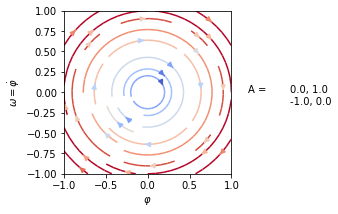

In [4]:
# Plotting phase portraits
def plot_phase_portrait(A,n = 10, xlabel=r'$x_1$', ylabel=r'$x_2$', Alabel='A'):
  '''
    A: matrix 2x2
    n: number of points in the n x n grid
  '''
  plt.figure(figsize=(3,3))
  x1 = np.linspace(-1, 1, n) # a 1D grid
  x = np.array(np.meshgrid(x1, x1)).reshape((2,-1)) # a 2D flattened grid
  # calculate the time-derivative of the state x in the line below
  # the output shape should be [2 x n^2]
  x_dot = A @ x # 2remove
  x_dot = x_dot.reshape((2,n,n))
  plt.streamplot(x1,x1,*x_dot,color=np.linalg.norm(x_dot,axis=0),cmap='coolwarm',density=0.5)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel);
  plt.text(1.2,0,f'{Alabel} = ')
  plt.text(1.7,-.15,f'{A[0,0]:.1f}, {A[0,1]:.1f} \n{A[1,0]:.1f}, {A[1,1]:.1f}')
  plt.xlim([-1,1])
  plt.ylim([-1,1])
  plt.clim(vmin=0,vmax=1)

A = np.array([[0, 1], [-1, 0]]) # pendulum dynamics
plot_phase_portrait(A, xlabel=r'$\theta$', ylabel=r'$\omega = \dot\theta$')

Following these streamlines in a figure above from some initial point $x_0$ step-by-step corresponds to integrating $\int_{t_0}^{t} \dot x(t) dt$ that we did in the previous exercise!

Color here shows how fast the state evolves: cooler colors mean slower, warmer colors -- faster!
(darkest blue: $|\mathbf{\dot x}| = 0$, brightest red: $|\mathbf{\dot x}| = 1$)

Like in Izhekevich quote, we don't even need to write equation to tell how the system behaves 🤯

## Analysing multi-dimensional linear dynamical systems

### Change of basis
The pendulum example above is, perhaps, the simplest linear dynamical system in physics. Its phase portrait is symmetrical!

But for other dynamical systems, with other matrices $A$, this might not be the case:

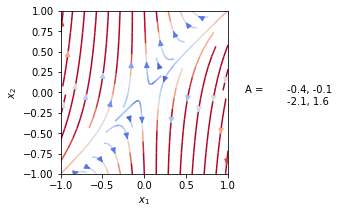

In [5]:
np.random.seed(2)
A = np.random.randn(2,2) # pick some values from N(0,1) for each component

plot_phase_portrait(A)


Looks very assymmetric! Can we make it better?

We are now considering an abstract linear dynamical system, so the components $x_1$ and $x_2$ do not mean much... Can we stretch and rotate this space such that in these new coordinates $(\hat x_1, \hat x_2)$  the derivatives $d{\hat x_i}/dt$ only depend on the respective component $x_i$ ? Or, in other words, can we change the basis to make the matrix $A$ diagonal?

$$\begin{bmatrix}
\frac{d\hat x_1}{dt} \\
\frac{d\hat x_2}{dt}
\end{bmatrix} = \begin{bmatrix}
a_1 & 0 \\
0 & a_2
\end{bmatrix} \begin{bmatrix}
\hat x_1 \\
\hat x_2
\end{bmatrix} = \begin{bmatrix}
a_1 \hat x_1 \\
a_2 \hat x_2
\end{bmatrix}
$$

In [6]:
S = np.eye(2)
@widgets.interact
def rotate_and_scale(stretch=widgets.FloatLogSlider(min=-1, max=+1, value=1.,description='stretch ↕'),
                     rotate=widgets.FloatSlider(min=-90, max=+90, step=5 ,description='rotate ⤾')):
  global S
  a = rotate * np.pi / 180
  S =  np.array([[np.cos(a),np.sin(a)],[-np.sin(a),np.cos(a)]]) @ np.array([[stretch,0],[0,1]])
  plot_phase_portrait(S @ A @ np.linalg.inv(S),
                      xlabel=r'$\hat{x_1}$', ylabel=r'$\hat{x_2}$', Alabel=r'$\hat{A}$')


interactive(children=(FloatLogSlider(value=1.0, description='stretch ↕', max=1.0, min=-1.0), FloatSlider(value…

What we are doing above corresponds to this transformation:
$$S \mathbf{\dot x} = SA\mathbf{x} = SA\underbrace{(S^{-1}S)}_{I}\mathbf{x} = (SAS^{-1})S\mathbf{x}$$
or, in other words, we make the following change of coordinates (i.e. change of the basis):
$$\mathbf{x} \rightarrow S\mathbf{x} ~$$
$$A \rightarrow SAS^{-1}$$

Did you manage to align the *special* directions in the phase portrait above with the new axes? How does the new, transformed matrix $\hat{A} = SAS^{-1}$ look like?

If something does not look right, check the solution:  LINK!

### Eigenvectors and eigenvalues

#### Real eigenvalues

In your first tutorial, you practiced calculating eigenvectors and eigenvalues. You were writing characteristic polynomial $p(\lambda) = \det(A-\lambda I)$ and finding its roots for eigenvalues and perfroming Gaussian elimination.

What we did above by rotating and stretching our phase space is the transformation of matrix $A$ into its *canonical form*. Everything is simpler in this form! The eigenvalues remain the same under stretching and rotation:

$$\hat{A}\mathbf{\hat{x}} = SA\mathbf{x} = S\lambda x = \lambda \mathbf{\hat{x}}$$

Could you tell what are the eigenvalues of $\hat{A}$ without writing anything down?

Now, check your guess by calculating the eigenvalues:


In [7]:
A_hat = S @ A @ np.linalg.inv(S)
print('Eigenvalues of A    :', np.linalg.eig(A)[0])
print('Eigenvalues of A_hat:', np.linalg.eig(A_hat)[0])

Eigenvalues of A    : [-0.47361843  1.69713139]
Eigenvalues of A_hat: [-0.47361843  1.69713139]


Now let us experiment with the eigenvalues and understand what they *mean* in the dynamical system:

In [8]:
@widgets.interact
def rotate_and_scale(lambda_1=widgets.FloatSlider(min=-1, max=+1, description='λ1'),
                     lambda_2=widgets.FloatSlider(min=-1, max=+1, description='λ2')):
  lambda_1 = lambda_1 if type(lambda_1)==float else lambda_1.value
  lambda_2 = lambda_2 if type(lambda_2)==float else lambda_2.value
  if lambda_1==0 and lambda_2==0:
    lambda_1 = -1e-10
  A_12 = np.array([[lambda_1, 0],
                [0, lambda_2]])
  plot_phase_portrait(A_12)


interactive(children=(FloatSlider(value=0.0, description='λ1', max=1.0, min=-1.0), FloatSlider(value=0.0, desc…

Indeed, in a canonical form, the 2D system with two real eigenvalues splits into two independent 1D dynamical systems:
$\dot x_i = \lambda_i x_i, i \in \{0,1\}.$ So, each eigenvalue here changes the dynamics along its eigenvector the same way as the parameter $a$ in Example 1.

The eigenvectors are trivial in the canonical form: they are just aligned with axes!

So, in order to find eigenvectors of the original evolution matrix $A$, we simply need to reverse the rotation and stretching:

In [9]:
A_hat = S @ A @ np.linalg.inv(S)
print('Trivial eigenvectors of A_hat:', np.round(np.linalg.eig(A_hat)[1].T,1))
print('Eigenvectors of A:', np.round(np.linalg.eig(A)[1].T,2))
S_inv = np.linalg.inv(S) # invert the transform
S_inv_norm = S_inv / np.linalg.norm(S_inv,axis=0)
print('Vectors derived from transformation:', np.round(S_inv_norm.T,2))

Trivial eigenvectors of A_hat: [[-0.7 -0.7]
 [ 0.  -1. ]]
Eigenvectors of A: [[-0.7  -0.71]
 [ 0.03 -1.  ]]
Vectors derived from transformation: [[1. 0.]
 [0. 1.]]


The above vectors should be the almost identical (up to a sign).

#### Complex eigenvalues

Let us return to the pendulum. What are the eigenvalues and eigenvectors for that system?

In [10]:
A = np.array([[0, 1], [-1, 0]])
np.linalg.eig(A)

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        +0.70710678j, 0.        -0.70710678j]]))

TODO

#### Zero eigenvalues

So far, we only looked at a full rank matrices $A$: such matrices that have all non-zero eigenvectors. What if one of them is actually zero?

TODO

### Fixed points and stability

**Fixed points** are the points that remain unchanged in time, meaning that the time derivative $\mathbf{\dot x}=\mathbf{0}$ there. There is only one such point in the linear systems which we considered above, which is $\mathbf{x}=\mathbf{0}$.

Fixed points can be stable and unstable. Stable means that once the state gets near the fixed point it will only get closer to it in the future (*more precisely it is called assymptotic stability*). Unstable means the opposite: the state only gets further away. The system can also be marginally stable, if it is neither stable nor unstable. 

A set of stable fixed points of a dynamical system is also called an **attractor**, while a set of unstable points -- a **repeller**.

If matrix $A$ has two eigenvalues: $\lambda_1$ and $\lambda_2$, what are the conditions for being 1) stable? 2) unstable?

SOLUTION: 
1) the LDS is stable if the real-parts of **both** eigenvalues are strictly negative: $\mathrm{Re}(\lambda_1)<0~\mathrm{AND}~\mathrm{Re}(\lambda_2)<0$

2) the LDS is unstable if **at least** one eigenvalue has a strictly-positive real part: $\mathrm{Re}(\lambda_1)>0~\mathrm{OR}~\mathrm{Re}(\lambda_2)>0$


### Summary

TODO: REMOVE SCARY WORDS

![Classification of Phase Portraits](https://upload.wikimedia.org/wikipedia/commons/3/3b/Stability_Diagram.png)

## **Exercise 3**: relationship between continuous time and discrete time linear dynamical systems

In the exercise above we were visualizing phase planes for the *continuous-time* dynamical systems. It is convinient, because there exists a derivative $\mathbf{\dot x}$, which we were plotting with streamplots.

However, when it comes to **numerical** integration, we typically use discrete time steps. We already applied one such discretization ( a forward Euler scheme) in Exercise 1.

Discrete time LDS               |           Continuous time LDS
------------------------------------|-------------------------------------
 $$\mathbf{x}_{t+1} = A_d \mathbf{x}_t$$           |    $$\frac{d\mathbf{x}(t)}{dt} = A_c\mathbf{x}(t)$$

### Exercise 3a: Relationship between evolution matrices

In this exercise, let us find the relationship between the continuous-time evolution matrix $A_c$ and the discrete-time matrix $A_d$ using forward Euler discretization.

### Exercise 3b: Relationship between eigenspectra

TODO


## **Exercise 4:** practice reading eigenspectra from papers

TODO: ADD EXAMPLES!!!

## Summary

In the first part of this tutorial, we learned:

1. What linear systems can and can not do
2. What fixed points are and how to check their stability
3. How to read eigenspectra
4. How is it related to different computations(e.g. categorization, filtering noise, memorization)


# Part 2: Nonlinear dynamical systems

### Dimensionality reduction on Hodgkin-Huxley model

Yesterday you have run simulations of a biophysically accurate neuron models with a Hodgkin-Huxley equation (HH). To recap, the set of HH equations contained the following 4 equations:

$$C \frac{dV}{dt} = -\bar g_K n^4 (V - V_K) - \bar g_{Na} m^3 h(V-V_{Na}) - \bar g_l (V - V_l) + I_{ext}\tag{4a}$$

$$\frac{dn}{dt} = \alpha_n(V)(1-n) - \beta_n(V) n\tag{4b}$$
$$\frac{dm}{dt} = \alpha_m(V)(1-m) - \beta_m(V) m\tag{4c}$$
$$\frac{dh}{dt} = \alpha_h(V)(1-h) - \beta_h(V) h\tag{4d}$$

The state space of this model is 4D, which is too much for visualization and analyse.
However, not all equations here are equally important. 

![Gate timescales](https://neuronaldynamics.epfl.ch/online/x27.png) | ![Activation-inactivation gates](https://neuronaldynamics.epfl.ch/online/x26.png)
:------------------------------------:|:-------------------------------------:
**Fig. 1a**  The voltage dependent time constants | **Fig. 1b** The equilibrium functions for the three variables m,n,h

#### Step 1. Time scale separation between fast ($V$) and very-fast ($m$) variables

  First, we can look at the timescales of different equations (Fig. 1a).  We see that sodium channel activation $m$ changes much faster than other gating variables, on a scale of a single spike ($<$1ms).
Therefore, we can assume that equation (4c) always quickly reaches equilibrium $dm/dt=0$, and substitute eq. (4c) with a *quasi-steady state* approximation $m(t) = m_0(u(t))$. Thus, we get rid of a differential equation (4c).

#### Step 2. Merging two similar slow equations ($n$ and $h$)

  From Fig.1a we also see that both sodium channel inactivation $h$ and potassium channel gating $n$ change slowly (on a scale of 5-10ms). We can also notice that in Fig.1b $n(V)$ looks roughly like $1-h(V)$ (not exactly, but it is an approximation).
So, since these two variables have similar dependencies on both time and voltage, we can substitute them with a single variable $w$ that approximates both gating variables. Thus, we merge eq. (4b) and (4d) into one. 

#### Result: 2D FitzHugh-Nagumo (FHN) model

Following 2 steps above, we merged 2 **fast** equations and 2 **slow** equations, which results in the following model:

\begin{align}
\mathrm{\mathbf{Fast:}} \quad\frac{dV}{dt} &= V(1-V)(V-V_{thr}) - w + i_{ext} \tag{5a}\\
\mathrm{\mathbf{Slow:}} ~\quad \frac{dw}{dt} &= \epsilon (\beta V - w) \tag{5b}
\end{align}

here some coefficients like time constants and capacitance of the membrane are typically omitted for simplicity.

The two equations are also often called **fast activator** and **slow inhibitor**. Because the first equation describes cell's depolarization and sodium channel opening (activation), while the second equation describes everything that works towards repolarization (potassium currents + sodium channels' inactivation).
The parameter responsible for fast/slow timescales separation is $\epsilon$, which is typically set to $0.01$ (i.e. 5b is 100x slower than 5a).

Now that we have a 2D system, we can visualize its phase portrait!

### Phase portrait of FHN

In [11]:
# Plotting phase portraits
def plot_FHN_phase_portrait(i_ext,V_thr,beta,
                            V_null = None, w_null = None,
                            V_min = -.5, V_max = 1.2,
                            w_min = -.1, w_max = .2,
                            eps=0.01,n=30):
  '''
    Plots a phase portrait for a FitzHugh-Nagumo model (eq. 5)
    n: number of points in the n x n grid
  '''
  plt.figure(figsize=(5,5))
  V_grid = np.linspace(V_min,V_max, n) # a 1D activator grid
  w_grid = np.linspace(w_min,w_max, n) # a 1D inhibitor grid
  x = np.array(np.meshgrid(V_grid, w_grid)).reshape((2,-1)) # a 2D flattened grid
  V, w = x
  V_dot = V*(1-V)*(V-V_thr) - w + i_ext #2remove
  w_dot = eps*(beta * V - w) #2remove
  plt.streamplot(V_grid,w_grid,V_dot.reshape(n,n),w_dot.reshape(n,n),
                 color=np.linalg.norm(np.array([V_dot,w_dot]),axis=0).reshape(n,n),
                 cmap='coolwarm',density=1.5)
  if V_null is not None:
    plt.plot(V_grid,V_null(V_grid,V_thr,i_ext),c='k')
  if w_null is not None:
    plt.plot(V_grid,w_null(V_grid,beta),c='k')
  plt.xlabel('fast activator V')
  plt.ylabel('slow inhibitor w')
  plt.xlim([V_min,V_max])
  plt.ylim([w_min,w_max])
  plt.clim(vmin=0,vmax=.2)

@widgets.interact
def interactive_FHN_portrait(i_ext=widgets.FloatSlider(min=-.2, max=.3, value=0), 
                            V_thr=widgets.FloatSlider(min=0, max=1, value=0.2),
                            beta=widgets.FloatSlider(min=0.05, max=.5, value=.4),):
  plot_FHN_phase_portrait(i_ext,V_thr,beta)

interactive(children=(FloatSlider(value=0.0, description='i_ext', max=0.3, min=-0.2), FloatSlider(value=0.2, d…

Looks very complicated! Although, if we look at some parts of the phase plane, locally it might resemble some of the patterns of an LDS behavior that we have seen before. (by the way, which ones?)

### Fixed points, nullclines, stability

While linear systems had just one fixed point, non-linear systems can have many. Moreover, even the number of fixed points can change depending on the parameters (like $V_{thr}$ or $\gamma$) 🤯

We can find fixed points, by dealing with equations (5a) and (5b) one by one. The set of points where $\dot V = 0$ is called **$V$-nullcline**. Nullclines divide the phase plane into two parts, based on the sign on the derivative. 

Let us add the nullclines to the phase portrait: 

In [12]:
V_nullcline = None
w_nullcline = None
@widgets.interact
def interactive_FHN_portrait(i_ext=widgets.FloatSlider(min=-.2, max=.3, value=0,step=.01), 
                            V_thr=widgets.FloatSlider(min=0, max=1, value=0.2),
                            beta=widgets.FloatSlider(min=0.05, max=.5, value=.4, step=0.01),):

  global V_nullcline, w_nullcline

  # write equations for nullclines as a function of V:
  V_nullcline = lambda V, V_thr, i_ext: V*(1-V)*(V-V_thr)+i_ext  #2remove
  w_nullcline = lambda V, beta: V*beta                            #2remove

  plot_FHN_phase_portrait(i_ext,V_thr,beta,
                          V_null = V_nullcline, w_null = w_nullcline)

interactive(children=(FloatSlider(value=0.0, description='i_ext', max=0.3, min=-0.2, step=0.01), FloatSlider(v…

What is the minimal and maximal number of fixed points we can get?

SOLUTION

### Analysing stability


#### Local stability


Suppose the nullclines are intersecting somewhere in the middle, like this:

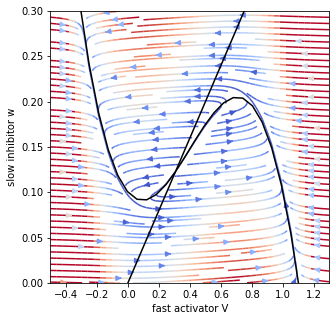

In [13]:
i_ext, V_thr, beta = 0.1, 0.2, 0.4
plot_FHN_phase_portrait(i_ext,V_thr,beta,
                        V_max=1.3, w_min=0, w_max=.3,
                        V_null = V_nullcline, w_null = w_nullcline)

TODO: INTERSECTION FIND

We see that globally, in the whole phase plane, the arrows that indicate the derivative $\mathbf{\dot x} = [\dot V, \dot w]^T$ change their directions in non-trivial ways, because $\mathbf{\dot x} = F(\mathbf{x})$ is non-linear. However, we can locally approximate the the evolution operator $F(.)$ with a linear function:

$$\mathbf{\dot x} = F(\mathbf{x}) \approx \left.\frac{\partial \mathbf{F}}{\partial \mathbf{x}}\right |_{x_0} \mathbf{x} = 
\begin{bmatrix}
    \frac{\partial F_V}{\partial V} & \frac{\partial F_V}{\partial w}\\
    \frac{\partial F_w}{\partial V} & \frac{\partial F_w}{\partial w}
\end{bmatrix}_{\mathbf{x}_0}  \mathbf{x}
= \mathrm{J} \mathbf{x}$$

This matrix $\mathrm{J}$ is called a **Jacobian** (scary name!). But it only has 4 components, which we can derive analytically (with pen and paper) from eq. 5a-5b:

In [14]:
eps = 0.01
V = 0.4 # FIND BETTER POINT
J = np.array([[(1-V)*(V-V_thr)+i_ext, -1],
              [eps*beta, -eps]]) #2remove

print("Eigenvalues of a Jacobian: ",np.linalg.eig(J)[0])

Eigenvalues of a Jacobian:  [0.20104686 0.00895314]


##### **Think!**
So, is it stable?

**Answer:** No. The eigenvalues are positive, so the solution is repulsed from the fixed point.

#### Global stability

Now let us take a step back. Literally. Let us zoom out on that phase portrait:

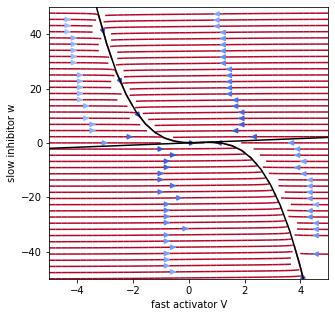

In [18]:
i_ext, V_thr, beta = 0.1, 0.2, 0.4
plot_FHN_phase_portrait(i_ext,V_thr,beta, eps=.1,
                        V_min=-5, V_max=5, w_min=-50, w_max=50,
                        V_null = V_nullcline, w_null = w_nullcline)

##### **Think!**
We see that all of the arrows are point towards the cubic V-nullcline. But why are they horizontal? *(click for answer)*


**Answer:** Because of timescale separation, eps << 1. The rate of change of the state is much higher in horizontal direction than in vertical.

After they reach the cubic V-nulcline, V does not change anymore, but $ dw/dt \sim -w$ for large $w$. So, overall, the system is attracter towards (0,0) on a global scale.

#### **Think!**

What should happen on intermediate timescale if:
1. **locally**: two nullclines have only one intersection which is a *repeller*
2. **globally** the states are *attracted* towards (0,0)

?


**Answer:** Since there are no other stable fixed points, the state can not stop changing. It is repelled both from the unstable fixed point and infinity... so it must then orbit around the unstable point!

### Visualizing trajectories

With all the knowledge you possess now, you can figure out all possible behaviors of this system with only pen and paper. But it is a lot of work! Instead, we can take a fun route and visulize some trajectories starting from random initial conditions:

In [16]:
def plot_FHN_trajectories(i_ext,V_thr,beta,
                          N=10, T=20000, dt=.1,eps=0.01,n=30):
  '''
    Plots a trajectories for a FitzHugh-Nagumo model (eq. 5)
  '''
  fig, ax = plt.subplots(1,2,figsize=(15,5),gridspec_kw={'width_ratios': [1,2]})

  # plot trajectories
  V_dot = lambda V, w: V*(1-V)*(V-V_thr) - w + i_ext #2remove
  w_dot = lambda V, w: eps*(beta * V - w) #2remove
  # generate some initial conditions
  V_0 = np.random.randn(N) * .5 + 0.5
  w_0 = np.random.randn(N) * .02 + .05
  # create an empty array for storing solutions 
  traject = np.empty((2,T+1,N))
  traject[:,0] = np.array([V_0, w_0])
  for t in range(T):
    traject[:,t+1] = np.clip(
                      [traject[0,t] + V_dot(*traject[:,t])*dt,
                      traject[1,t] + w_dot(*traject[:,t])*dt],-10,10)
  for i in range(N):
    ax[0].plot(*traject[...,i],alpha=.3,linewidth=5)
    ax[1].plot(traject[0,:,i])

  # plot nullclines
  global V_nullcline, w_nullcline
  V_grid = np.linspace(-.5, 1.2, n) # a 1D activator grid
  ax[0].plot(V_grid,V_nullcline(V_grid,V_thr,i_ext),c='k')
  ax[0].plot(V_grid,w_nullcline(V_grid,beta),c='k')
  
  ax[0].set_xlabel('fast activator V')
  ax[0].set_ylabel('slow inhibitor w')
  ax[1].set_ylabel('fast activator V')
  ax[1].set_xlabel('time')
  ax[0].set_xlim([-.5,1.2])
  ax[1].set_ylim([-.5,1.2])
  ax[0].set_ylim([-.1,.2])

@widgets.interact
def interactive_FHN_trajectories(i_ext=widgets.FloatSlider(min=-.2, max=.3, value=0,step=.01), 
                            V_thr=widgets.FloatSlider(min=0, max=1, value=0.2),
                            beta=widgets.FloatSlider(min=0.05, max=.5, value=.25, step=.01),):
  plot_FHN_trajectories(i_ext,V_thr,beta)

interactive(children=(FloatSlider(value=0.0, description='i_ext', max=0.3, min=-0.2, step=0.01), FloatSlider(v…

Yay, we've got action potentials!

Not particularly beautiful action potentials (well, it is an approximated, reduced model), but still action potentials!

If you don't see anything like action potentials, try stimulating the FHN neuron just a little bit with the external current $i_{ext}$. It makes sense, right? The neuron responds to some inputs.



## Summary

In the second part of the tutorial, we:
1. Learned that nonlinear systems can have not just *one* but *many* fixed points
2. Learned how to linearize the dynamical system about a fixed point and check its local stability
3. Learned a new type of an attractor: a limit cycle!
4. Simulated some action potentials!

# Parts 3-4: Modelling dynamics based on data

[Go to the next notebook](https://colab.research.google.com/drive/1CM6GLsDdUpaXcAnjjiLQGtUJZe5GH7MM?usp=sharing) WORK IN PROGRESS! 

# References

1. Izhikevich, Eugene M. [Dynamical systems in neuroscience.](https://www.izhikevich.org/publications/dsn.pdf) MIT press, 2007.

2. Gerstner, Wulfram, et al. [Neuronal dynamics](https://neuronaldynamics.epfl.ch/index.html): From single neurons to networks and models of cognition. Cambridge University Press, 2014.

<!-- ## Other great tutorials: -->
3. Linear dynamical systems by Bing Wen Brunton and Alice Schwarze [Neuromatch: W2D2](https://compneuro.neuromatch.io/tutorials/W2D2_LinearSystems/student/W2D2_Tutorial1.html), 2020-now